In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.models import Sequential

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df = pd.read_csv('META LSTM.csv')
#df = pd.read_csv('PFE LSTM.csv')
#df = pd.read_excel('TSLA LSTM.xlsx')
#df = pd.read_excel('WMT LSTM.xlsx')

#df = pd.read_csv('Stock Prices updated.csv')

df = df[['Symbol','Date','Open','High','Low','Close','Adj Close','Volume']]

df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,META,2/28/22,207.679993,213.149994,206.830002,211.029999,211.029999,34239800
1,META,3/1/22,209.869995,211.750000,202.220001,203.490005,203.490005,27094900
2,META,3/2/22,204.779999,209.149994,202.020004,208.110001,208.110001,29452100
3,META,3/3/22,209.020004,209.080002,201.419998,202.970001,202.970001,27263500
4,META,3/4/22,202.369995,205.889999,198.789993,200.059998,200.059998,32130900
...,...,...,...,...,...,...,...,...
245,META,2/17/23,170.220001,173.179993,169.699997,172.880005,172.880005,22191900
246,META,2/21/23,174.309998,178.169998,171.880005,172.080002,172.080002,34592600
247,META,2/22/23,171.070007,172.759995,169.690002,171.119995,171.119995,22433200
248,META,2/23/23,172.000000,173.690002,169.380005,172.039993,172.039993,20017800


In [5]:
df['returns'] = df.Close.pct_change()

In [6]:
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,META,2/28/22,207.679993,213.149994,206.830002,211.029999,211.029999,34239800,NaN
1,META,3/1/22,209.869995,211.750000,202.220001,203.490005,203.490005,27094900,-0.035729
2,META,3/2/22,204.779999,209.149994,202.020004,208.110001,208.110001,29452100,0.022704
3,META,3/3/22,209.020004,209.080002,201.419998,202.970001,202.970001,27263500,-0.024698
4,META,3/4/22,202.369995,205.889999,198.789993,200.059998,200.059998,32130900,-0.014337
...,...,...,...,...,...,...,...,...,...
245,META,2/17/23,170.220001,173.179993,169.699997,172.880005,172.880005,22191900,0.002552
246,META,2/21/23,174.309998,178.169998,171.880005,172.080002,172.080002,34592600,-0.004628
247,META,2/22/23,171.070007,172.759995,169.690002,171.119995,171.119995,22433200,-0.005579
248,META,2/23/23,172.000000,173.690002,169.380005,172.039993,172.039993,20017800,0.005376


In [7]:
df['log_returns'] = np.log(1+ df['returns'])
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns,log_returns
0,META,2/28/22,207.679993,213.149994,206.830002,211.029999,211.029999,34239800,NaN,NaN
1,META,3/1/22,209.869995,211.750000,202.220001,203.490005,203.490005,27094900,-0.035729,-0.036383
2,META,3/2/22,204.779999,209.149994,202.020004,208.110001,208.110001,29452100,0.022704,0.022450
3,META,3/3/22,209.020004,209.080002,201.419998,202.970001,202.970001,27263500,-0.024698,-0.025009
4,META,3/4/22,202.369995,205.889999,198.789993,200.059998,200.059998,32130900,-0.014337,-0.014441
...,...,...,...,...,...,...,...,...,...,...
245,META,2/17/23,170.220001,173.179993,169.699997,172.880005,172.880005,22191900,0.002552,0.002548
246,META,2/21/23,174.309998,178.169998,171.880005,172.080002,172.080002,34592600,-0.004628,-0.004638
247,META,2/22/23,171.070007,172.759995,169.690002,171.119995,171.119995,22433200,-0.005579,-0.005594
248,META,2/23/23,172.000000,173.690002,169.380005,172.039993,172.039993,20017800,0.005376,0.005362


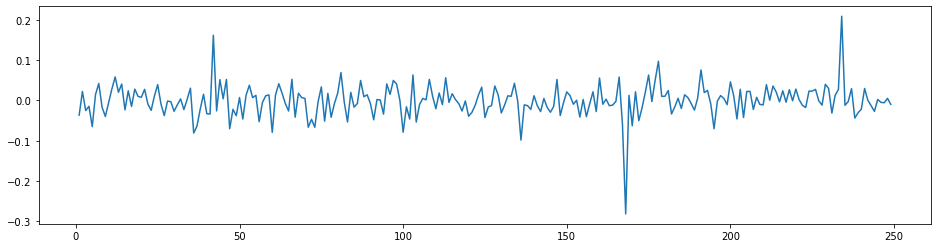

In [8]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (16,4))
plt.plot(df.log_returns)


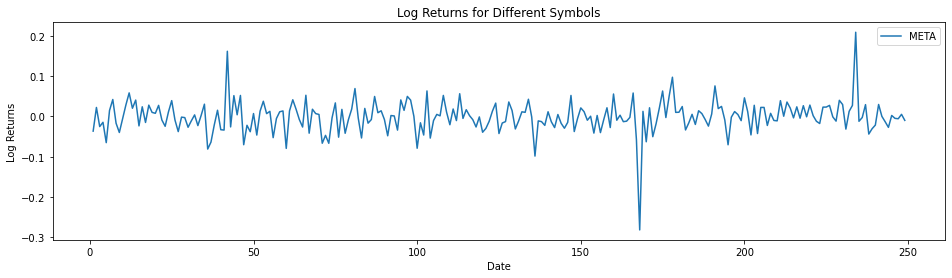

In [9]:
grouped_data = df.groupby("Symbol")

# Loop through each group and plot the data
plt.figure(1, figsize=(16, 4))
for symbol, group in grouped_data:
    plt.plot(group["log_returns"], label=symbol)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns for Different Symbols")
plt.legend()

# Show the plot
plt.show()

### Preprocessing Steps

In [10]:
df.dropna(inplace = True)
X = df[['Close','log_returns']].values
X

array([[ 2.03490005e+02, -3.63834071e-02],
       [ 2.08110001e+02,  2.24498983e-02],
       [ 2.02970001e+02, -2.50085982e-02],
       [ 2.00059998e+02, -1.44408812e-02],
       [ 1.87470001e+02, -6.49984706e-02],
       [ 1.90289993e+02,  1.49303501e-02],
       [ 1.98500000e+02,  4.22399110e-02],
       [ 1.95210007e+02, -1.67131636e-02],
       [ 1.87610001e+02, -3.97105932e-02],
       [ 1.86630005e+02, -5.23726980e-03],
       [ 1.92029999e+02,  2.85235301e-02],
       [ 2.03630005e+02,  5.86530421e-02],
       [ 2.07839996e+02,  2.04638895e-02],
       [ 2.16490005e+02,  4.07758473e-02],
       [ 2.11490005e+02, -2.33666404e-02],
       [ 2.16649994e+02,  2.41053780e-02],
       [ 2.13460007e+02, -1.48336272e-02],
       [ 2.19570007e+02,  2.82216287e-02],
       [ 2.21820007e+02,  1.01951536e-02],
       [ 2.23589996e+02,  7.94772593e-03],
       [ 2.29860001e+02,  2.76564295e-02],
       [ 2.27850006e+02, -8.78288607e-03],
       [ 2.22360001e+02, -2.43898517e-02],
       [ 2.

In [11]:
X

array([[ 2.03490005e+02, -3.63834071e-02],
       [ 2.08110001e+02,  2.24498983e-02],
       [ 2.02970001e+02, -2.50085982e-02],
       [ 2.00059998e+02, -1.44408812e-02],
       [ 1.87470001e+02, -6.49984706e-02],
       [ 1.90289993e+02,  1.49303501e-02],
       [ 1.98500000e+02,  4.22399110e-02],
       [ 1.95210007e+02, -1.67131636e-02],
       [ 1.87610001e+02, -3.97105932e-02],
       [ 1.86630005e+02, -5.23726980e-03],
       [ 1.92029999e+02,  2.85235301e-02],
       [ 2.03630005e+02,  5.86530421e-02],
       [ 2.07839996e+02,  2.04638895e-02],
       [ 2.16490005e+02,  4.07758473e-02],
       [ 2.11490005e+02, -2.33666404e-02],
       [ 2.16649994e+02,  2.41053780e-02],
       [ 2.13460007e+02, -1.48336272e-02],
       [ 2.19570007e+02,  2.82216287e-02],
       [ 2.21820007e+02,  1.01951536e-02],
       [ 2.23589996e+02,  7.94772593e-03],
       [ 2.29860001e+02,  2.76564295e-02],
       [ 2.27850006e+02, -8.78288607e-03],
       [ 2.22360001e+02, -2.43898517e-02],
       [ 2.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)).fit(X)
X_scaled = scaler.transform(X)

In [13]:
X_scaled[:5]

array([[0.79031594, 0.4997145 ],
       [0.82218237, 0.6195132 ],
       [0.78672921, 0.52287633],
       [0.76665745, 0.54439474],
       [0.67981791, 0.44144737]])

In [14]:
y = [x[0] for x in X_scaled]

y[:5]

[0.7903159415557036,
 0.8221823730341903,
 0.7867292101770343,
 0.7666574507239671,
 0.6798179089255366]

In [15]:
split = int(len(X_scaled) * 0.7 )

print(split)

174


In [16]:
x_train = X_scaled[:split]
x_test = X_scaled[split : len(X_scaled)]

y_train = y[:split]
y_test = y[split : len(y)]

In [17]:
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

In [18]:
n =3 

xtrain = []
ytrain = []

xtest = []
ytest = []

for i in range(n, len(x_train)):
    xtrain.append(x_train[i - n : i, : x_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
    
for i in range(n, len(x_test)):
    xtest.append(x_test[i - n : i, : x_test.shape[1]])
    ytest.append(y_test[i])  # predict next record
    

## Based on the last 3 days we have n = 3 here we are predicting next day price

In [19]:
ytest

[0.15836666929674437,
 0.16629875602450472,
 0.17457579172087778,
 0.1943026553161078,
 0.1677472786219023,
 0.155469677902475,
 0.15960822265092445,
 0.14450267316582555,
 0.15540074080567767,
 0.1609187124121514,
 0.1551938246732355,
 0.1370533571792475,
 0.14174366149695128,
 0.20133808592702607,
 0.21747827056461178,
 0.2385156246108191,
 0.23120428765988588,
 0.17388605173647798,
 0.17257550955422585,
 0.18223202452964837,
 0.18616359934512983,
 0.17795555385632955,
 0.21547798839795984,
 0.22541035729237213,
 0.18788797517176692,
 0.2105117777402412,
 0.17636915775508766,
 0.19437159241290503,
 0.212787966246908,
 0.19457856165612264,
 0.2009242522826411,
 0.19292312361603325,
 0.1842323066963003,
 0.21623671790018217,
 0.21678847815918678,
 0.24713750374400445,
 0.2652779705482422,
 0.2623120420571754,
 0.28355636534660034,
 0.27976271714573864,
 0.30404195844405246,
 0.30335216603862747,
 0.329700679021416,
 0.3315629290416475,
 0.32038900748280574,
 0.3042488752662451,
 0.3258

In [20]:
xtrain[0]
#y_train[0]

array([[0.79031594, 0.4997145 ],
       [0.82218237, 0.6195132 ],
       [0.78672921, 0.52287633]])

In [21]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [22]:
scaler.inverse_transform(val)

array([[200.0599976 ,  -0.28179386]])

In [23]:
xtrain, ytrain = (np.array(xtrain), np.array(ytrain))
xtrain  = np.reshape( xtrain, (xtrain.shape[0], xtrain.shape[1],xtrain.shape[2]))
                  
xtest, ytest = (np.array(xtest), np.array(ytest))
xtest  = np.reshape( xtest, (xtest.shape[0], xtest.shape[1], xtest.shape[2]))


In [24]:
print(xtrain.shape)
print(ytrain.shape)

print("----")

print(xtest.shape)
print(ytest.shape)

(171, 3, 2)
(171,)
----
(72, 3, 2)
(72,)


In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [26]:
model = Sequential()

model.add(LSTM(4, input_shape = (xtrain.shape[1], xtrain.shape[2])))

model.add(Dense(1))

model.compile(loss = "mean_squared_error",optimizer = "adam")

model.fit(
xtrain, ytrain, epochs = 25, validation_data = (xtest, ytest), batch_size = 16, verbose = 1
)

Epoch 1/25
11/11 [==============================] - 3s 55ms/step - loss: 0.5268 - val_loss: 0.1813
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 0.4454 - val_loss: 0.1423
Epoch 3/25
11/11 [==============================] - 0s 6ms/step - loss: 0.3749 - val_loss: 0.1094
Epoch 4/25
11/11 [==============================] - 0s 9ms/step - loss: 0.3123 - val_loss: 0.0823
Epoch 5/25
11/11 [==============================] - 0s 6ms/step - loss: 0.2558 - val_loss: 0.0607
Epoch 6/25
11/11 [==============================] - 0s 6ms/step - loss: 0.2074 - val_loss: 0.0441
Epoch 7/25
11/11 [==============================] - 0s 7ms/step - loss: 0.1648 - val_loss: 0.0328
Epoch 8/25
11/11 [==============================] - 0s 6ms/step - loss: 0.1285 - val_loss: 0.0266
Epoch 9/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0993 - val_loss: 0.0252
Epoch 10/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0765 - val_loss: 0.0280
Epoch 11/25
11/11 

## Taking Epoch as 25 as the dataset is smaller

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 112       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [28]:
trainpredict = model.predict(xtrain)

testpredict = model.predict(xtest)


3/3 [==============================] - 0s 2ms/step


In [29]:
trainpredict = np.c_[trainpredict,np.zeros(trainpredict.shape)]

testpredict = np.c_[testpredict,np.zeros(testpredict.shape)]

## This will add zeros to reserve the spacefor future predictions where the new column will be filled with predicted values to hold the correct shape to hold both training and predicted data

In [30]:
## Invert Predictions

trainpredict = scaler.inverse_transform(trainpredict)
trainpredict = [x[0] for x in trainpredict]

testpredict = scaler.inverse_transform(testpredict)
testpredict = [x[0] for x in testpredict]



In [31]:
print(trainpredict[:5])
print(testpredict[:5])


[180.492870198304, 181.11986150430562, 177.395072037222, 178.13750488984797, 179.0724526594361]
[154.0022369167819, 155.6483396979894, 158.84560562779805, 160.11525524511833, 158.66236302010518]


In [32]:
## calculate mean squared error 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

trainscore_mse = mean_squared_error([x[0][0]  for x in xtrain], trainpredict, squared = False )
trainscore_rmse = sqrt(trainscore_mse)
trainscore_mae = mean_absolute_error([x[0][0]  for x in xtrain], trainpredict)
r2_train = r2_score([x[0][0]  for x in xtrain], trainpredict)

print("Train Score: %.2f MSE" % (trainscore_mse))
print("Train Score: %.2f RMSE" % (trainscore_rmse))
print("Train Score: %.2f MAE" % (trainscore_mae))
print("Train Score: %.2f R2 Score" % (r2_train))

testscore_mse = mean_squared_error([x[0][0]  for x in xtest], testpredict, squared = False )
testscore_rmse = sqrt(testscore_mse)
testscore_mae = mean_absolute_error([x[0][0]  for x in xtest], testpredict)
r2_test = r2_score([x[0][0]  for x in xtest], testpredict)

print("Test Score: %.2f RMSE" % (testscore_mse))
print("Test Score: %.2f RMSE" % (testscore_rmse))
print("Test Score: %.2f MAE" % (testscore_mae))
print("Test Score: %.2f R2 Score" % (r2_test))


Train Score: 173.68 MSE
Train Score: 13.18 RMSE
Train Score: 173.50 MAE
Train Score: -723406.72 R2 Score
Test Score: 164.03 RMSE
Test Score: 12.81 RMSE
Test Score: 163.87 MAE
Test Score: -886702.09 R2 Score


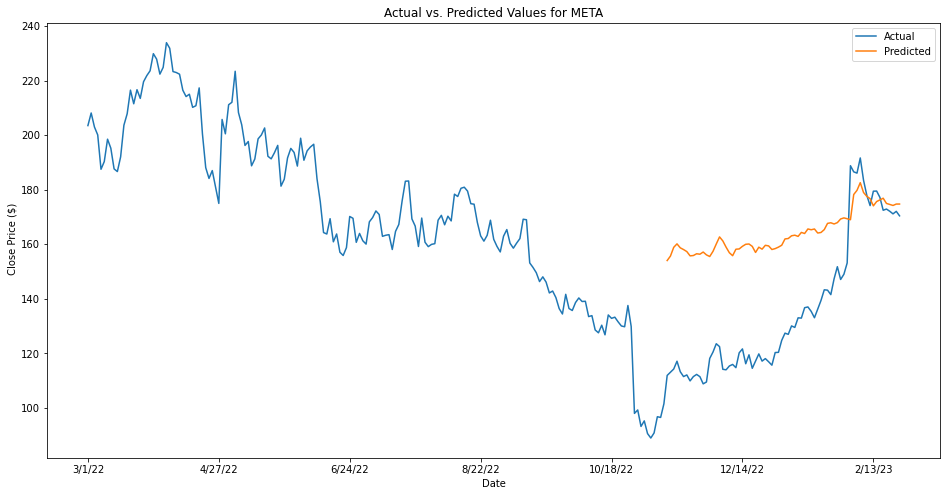

In [33]:
import matplotlib.pyplot as plt


# Set figure size and create axes object
fig, ax = plt.subplots(figsize=(16, 8))

# Plot actual and predicted values
ax.plot(df['Date'], df['Close'], label='Actual')
ax.plot(df.iloc[split+n:]['Date'], testpredict, label='Predicted')

# Add labels and legend
ax.set_title('Actual vs. Predicted Values for META')
ax.set_xlabel('Date')
ax.set_ylabel(' Close Price ($)')
ax.legend()

# Format x-axis date labels
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

# Show the plot
plt.show()

In [34]:
import pandas as pd

# Load original data into a DataFrame
df = pd.read_csv('META LSTM.csv', index_col='Date', parse_dates=True)

# Extract the dates from the test data
dates = df.index[-len(testpredict):]

# Create a new DataFrame with the predicted values
predictions = pd.DataFrame({'Predictions': testpredict}, index=dates)

# Concatenate the original "Close" column with the predicted values
result = pd.concat([df['Close'], predictions], axis=1)


In [35]:
result = result.tail(30)

In [36]:
result.to_csv('META Actual and Predicted Prices Updated.csv')